In [8]:
pip install fastai

In [9]:
from fastai.vision.all import * 

C:\Users\panda\anaconda3\envs\py38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
path='D:\sample 1\corn disease'

In [11]:
fns=get_image_files(path)
fns

(#9145) [Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp 9357_270deg.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp 9357_new30degFlipLR.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655_270deg.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655_90deg.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655_new30degFlipLR.JPG'),Path('D:/sample 1/corn disease/train/Corn_(maize)___Cercospora_le

In [12]:
leaf=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=(0.2),seed=42),
               get_y=parent_label,item_tfms=Resize(224))

In [13]:
dls=leaf.dataloaders(path,num_workers = 0,bs=64)

In [14]:
learner=cnn_learner(dls,resnet18,metrics=[accuracy, error_rate])

C:\Users\panda\anaconda3\envs\py38\lib\site-packages\fastai\vision\learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\panda/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:01<00:00, 31.6MB/s]


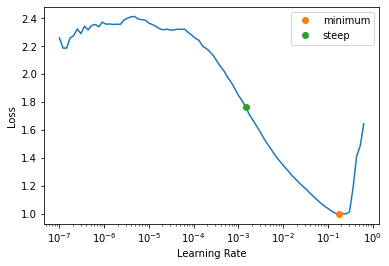

In [15]:
lr_min,lr_steep = learner.lr_find(suggest_funcs=(minimum,steep))

In [16]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-02, steepest point: 1.45e-03


In [17]:
lr_steep

0.0014454397605732083

In [ ]:
learner.fine_tune(3,base_lr=lr_steep,cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,accuracy,error_rate,time
